## **Actividad. Clasificación con Naive Bayes**

**Spam Dataset**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### **Lectura del dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SPAM text message 20170820 - Data.csv to SPAM text message 20170820 - Data.csv


In [3]:
path = "/content/SPAM text message 20170820 - Data.csv"
df = pd.read_csv(path, sep=",")
print (df.shape)
df.head()

(5572, 2)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [5]:
df["Category"].value_counts()/len(df)

ham     0.865937
spam    0.134063
Name: Category, dtype: float64

In [6]:
df["Message"].values

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

### **TF-IDF-Vectorizer**

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
from nltk.corpus import stopwords
len(stopwords.words('english'))

179

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
vect = vectorizer.fit_transform(df["Message"].values)

In [11]:
vect.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
vocab = np.sort(list(vectorizer.vocabulary_.keys()))
df_tf = pd.DataFrame(vect.todense(), columns = vocab)
print(df_tf.shape)
df_tf.head()

(5572, 8573)


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,0207,02072069400,02073162414,02085076972,021,03,04,0430,05,050703,0578,06,07,07008009200,07046744435,07090201529,07090298926,07099833605,07123456789,0721072,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07781482378,07786200117,077xxx,078,07801543489,...,youi,young,younger,youphone,youre,yourinclusive,yourjob,youuuuu,youwanna,yoville,yowifes,yoyyooo,yr,yrs,ystrday,ything,yummmm,yummy,yun,yunny,yuo,yuou,yup,yupz,zac,zaher,zealand,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_tf.max(axis=1)

0       0.346622
1       0.546624
2       0.469628
3       0.619073
4       0.461851
          ...   
5567    0.332808
5568    0.648599
5569    0.609531
5570    0.382396
5571    0.695334
Length: 5572, dtype: float64

In [14]:
df_tf.idxmax(axis=1)

0              amore
1                oni
2                 fa
3                say
4              lives
            ...     
5567    087187272008
5568       esplanade
5569            pity
5570        bitching
5571            rofl
Length: 5572, dtype: object

### **Split en train/test**

In [15]:
from sklearn.model_selection import train_test_split

X = df_tf.values
y = df["Category"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4457, 8573) (4457,)
(1115, 8573) (1115,)


### **Modelado y Evaluación**

Precisión sobre los datos de entrenamiento: 98.23
Precisión sobre los datos de test: 96.86
Confusion matrix:



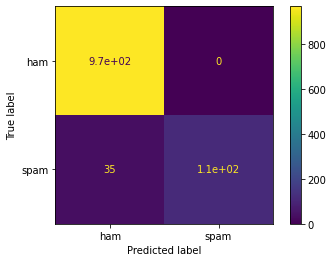

In [16]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB(alpha=1.0) ## probar con 5 o 10
mnb_model.fit(X_train, y_train)
pred_train = mnb_model.predict(X_train)
pred_test = mnb_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*mnb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*mnb_model.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(mnb_model, X_test, y_test, cmap=plt.cm.viridis,)
plt.show()

Por tanto, tenemos un Recall de:

$Recall = \frac{110}{110+35} = 0.75$

$Precision = \frac{110}{110} = 1$

Son métricas bastante buenas. Cuando el modelo predice que es Spam siempre es Spam. Lo que ocurre con el Recall es que el 25% de los Spams no se detectan.


Quedaría realizar el mismo ejercicio con Cross-Validation y calcular el valor límite de las probabilidades para ajustar Recall y Precision.
Es decir, lo mismo que se hizo en la actividad de Telecom Churn de KNN